## Optical character recognition using pytesseract-ocr

In this blog, we will be using computer vision techniques to extract the text from the images. After extracting the text we will apply some basic functions of OpenCV on that text to enhance it and to get more accurate results. This project will be very useful as it will save time and effort of typing from an image.

## Scope:

* This application could be time saving for giant organisations which will fetch the text from images. 
* It can open the world of "paperless documentation" which also helps to upgrade the storage.
* It can also help in automation process as it can fetch the text from the images itself.

We will importing request library for fetching the url for git files and images.


In [1]:
#import requests to install tesseract
import requests  

In [2]:
# Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)  

In [3]:
# Writing data to file to avoid path isuues
with open("ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
            file.write(block)

We will now download tesseract which is required for pytesseract library to run and save the file at the path in open() function.

In [4]:
!pip install pytesseract

In this step we will install the required libraries for ocr and we will also import IPython fucntions to clear the undesired.

In [5]:
# Installing libraries required for optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Importing IPython to clear output which is not important 
from IPython.display import HTML, clear_output
clear_output()

Now we will install pytesseract and opencv libraries which are the soul for our text recognition.

In [6]:
# Installing pytesseract and opencv
! pip install pytesseract wand opencv-python
clear_output()

Importing required libraries

In [7]:
# Import libraries
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

In this step we will, open an image resize it and then again save it for further use and visualize it.

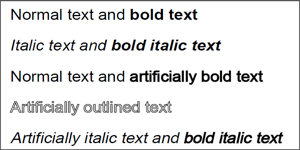

In [8]:
# Reading image form url
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png', stream=True).raw)
image = image.resize((300,150))
image.save('sample.png')
image

Setting the path

In [22]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

Here we will be extracting the text from image with custom configuration.

In [23]:
# Simply extracting text from image
custom_config = r'-l eng --oem 3 --psm 6' 
text = pytesseract.image_to_string(image,config=custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



Here in custom configuration you can see the "eng" which indicates the english language i.e it will recoginized the english letters you can also add multiple languages and "psm" means Page segmentation which set the configuration of how the chunks will recognized the characters and "oem" is the default configuration.

Now we will remove unwanted symbols from the text we extracted by replacing the symbol with an empty string.

In [10]:
# Extracting text from image and removing irrelevant symbols from characters
try:
    text=pytesseract.image_to_string(image,lang="eng")
    characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
    new_string = text
    for character in characters_to_remove:
        new_string = new_string.replace(character, "")
    print(new_string)
except IOError as e:
    print("Error (%s)." % e)

 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 

 



In below cell, we are reading the image into opencv format to process it further. This is required when we need to extract the text from complex images.

In [24]:
# Now we will perform opencv operations to get text from complex images
image = cv2.imread('sample.png')
image

array([[[ 85,  85,  85],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 85,  85,  85]],

       [[106, 106, 106],
        [213, 213, 213],
        [216, 216, 216],
        ...,
        [216, 216, 216],
        [213, 213, 213],
        [106, 106, 106]],

       [[113, 113, 113],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [113, 113, 113]],

       ...,

       [[112, 112, 112],
        [251, 251, 251],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [112, 112, 112]],

       [[112, 112, 112],
        [251, 251, 251],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [112, 112, 112]],

       [[ 92,  92,  92],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [ 92,  92,  92]]

Converting the images to grayscale so that it becomes less complex to process as it will have only two values 0 and 1. Here we are using the cv2.cvtColor() method to convert the colored image into the grayscale format and cv2.cvtColor can actually helps in the 150 color conversion of the images

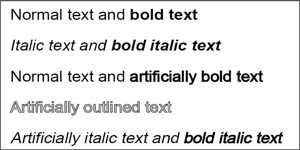

In [12]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

Now we will blur the image so that we can remove the noise from the image. Here,  we are using the function cv2.medianBlur() function with an aim of reducing the noise from the image, blurring is basically the technique which smoothen the images by applying relevant smoothing filters it is one of widely used method in image processing.

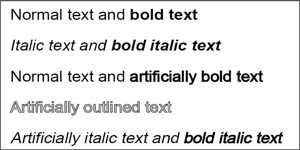

In [13]:
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

We will perform threshold transformation here. 
cv2. Thresholding works on the simple concept i.e whenever the pixel value is lower than the given threshold value then the color is white otherwise the pixel color woulb be just opposite which is black. The function used is cv2.threshold.

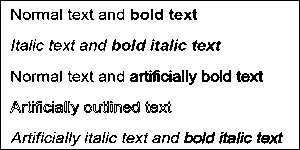

In [14]:
# thresholding
def thresholding(image):
                        # source image,  grayscale image
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

Here we are doing erode transformation. 
Erode transformation is one of the most basic and important step in image transformation in erode transformation it usually fits the missing shapes and lattices in the images which latter helps in recognizing the character in the images when it is slightly blurred or distorted. Here for erode transformation we are using the erode() function from cv2 library.

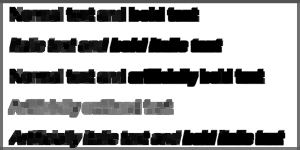

In [15]:
# erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

Here we will perform morphological transformation. Morphological transformation is one of the best suited technique for binary images where it sorts the image according to its pixel values rather than going for pixel values of the images keeping in account about the threshold values too 

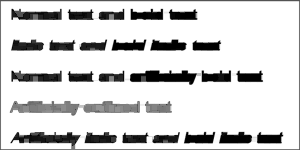

In [16]:
# Morphology
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

Here we are trying to match the image. As we are passing same image for matching we got the similarity of 99.99%. Here, template matching is a method for searching and finding the location of a template image in a larger image. For template matching we are using matchTemplate() function from the cv2 library.

In [19]:
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray, gray)
match

array([[1.]], dtype=float32)

Now we will segregate every character in the text by creating a rectangle around it.

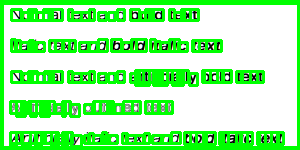

In [20]:
# Drawing rectangle around text
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

Similarly we can draw rectangle around the specific pattern or word.

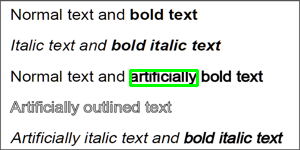

In [21]:
# Drawing pattern on specific pattern or word
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = 'artificially'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)

# Conclusion:

We started with learning how to install tesseract which is the used for text extraction. Next we took an image and extracted the text from that image. We learned that we need to use certain image transformation function of OpenCV in order to extract text from complex images.
